In [ ]:
!git clone https://github.com/evgmaslov/structure_generation

In [2]:
from pathlib import Path
import sys
repo = Path("/content/structure_generation").resolve()
sys.path.append("/content/structure_generation/")

In [ ]:
!cd {repo} && pip install -r requirements.txt

In [ ]:
from models import DiffusersDDPM3D
from diffusers import DDPMScheduler, UNet3DConditionModel
import torch

In [ ]:
model_args = {
    "device":"cuda",
    "sample_shape": (32, 32, 32),
    "noise_scheduler": DDPMScheduler(num_train_timesteps=1000),
    "unet_n_blocks": 2,
    "unet_channels": 64,
    "is_attn":(False, False, True, True),
    "ch_mults":(1, 2, 2, 4),
    "channels":(64, 128, 128, 256),
}
model = DiffusersDDPM3D(model_args)
model.eps_model = UNet3DConditionModel.from_pretrained("evgmaslov/diffusion-3d-material").to("cuda")

  0%|          | 0/1000 [00:00<?, ?it/s]

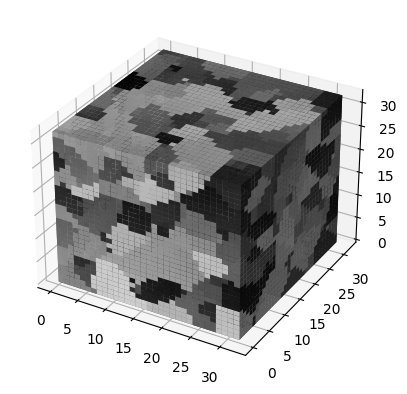

''

In [13]:
noise = {"noise":torch.randn(1, 1, 32, 32, 32).to("cuda")}
model.show_outputs(noise)